1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



max_speeds: [28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76]
years_nb: 21
cprob: [0.0455 0.0909 0.1364 0.1818 0.2273 0.2727 0.3182 0.3636 0.4091 0.4545
 0.5    0.5455 0.5909 0.6364 0.6818 0.7273 0.7727 0.8182 0.8636 0.9091
 0.9545]
max_speed_sorted: [22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97]
fifty_wind: 32.980


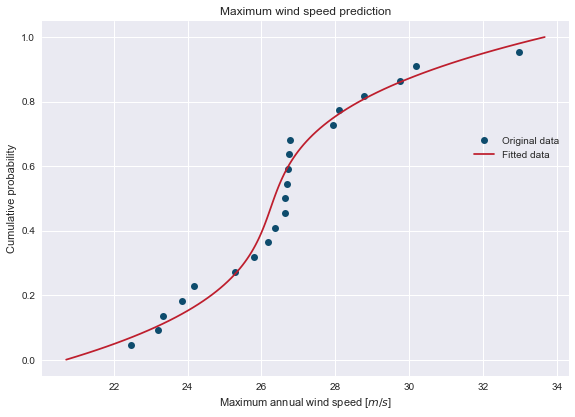

In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

filename = "max-speeds.npy"
max_speeds = np.load(filename)
years_nb = max_speeds.shape[0]
print("max_speeds:", max_speeds)
print("years_nb:", years_nb)

cprob = np.arange(1,years_nb+1)/(years_nb+1)
print("cprob:", cprob)

max_speed_sorted = np.sort(max_speeds)
print("max_speed_sorted:", max_speed_sorted)

quantile_func = UnivariateSpline(cprob, max_speed_sorted)
fifty_prob = 1 - 0.02
fifty_wind = quantile_func(fifty_prob)
print(f"fifty_wind: {fifty_wind:.3f}")

# Plotting
probs = np.linspace(0, 1, 100)
max_speed_fit = quantile_func(probs)

plt.style.use("seaborn")
fig, ax = plt.subplots(1,1)
fig.tight_layout()
ax.plot(max_speed_sorted, cprob, 'o', color="#0e4c6d", label="Original data") # blue
ax.plot(max_speed_fit, probs, '-', color="#be1e2d", label="Fitted data") # red
ax.set_title("Maximum wind speed prediction")
ax.set_xlabel("Maximum annual wind speed [$m/s$]")
ax.set_ylabel("Cumulative probability")
_ = plt.legend(loc="best", bbox_to_anchor=(0.3, 0, 0.7, 0.7))

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Parameters for t_min: [ 25.15    0.601   6.928 -36.713]
Parameters' covariance for t_min:
 [[ 1.728e+00 -2.487e-04 -3.636e-03  1.892e-01]
 [-2.487e-04  5.307e-04 -1.115e-02  1.600e-02]
 [-3.636e-03 -1.115e-02  2.431e-01 -3.310e-01]
 [ 1.892e-01  1.600e-02 -3.310e-01  1.419e+00]]
Parameters' errors for t_min: [1.315 0.023 0.493 1.191]
Parameters for t_max: [10.582  0.592  7.538 27.95 ]
Parameters' covariance for t_max:
 [[ 0.168 -0.001  0.018  0.007]
 [-0.001  0.    -0.01   0.006]
 [ 0.018 -0.01   0.226 -0.142]
 [ 0.007  0.006 -0.142  0.183]]
Parameters' errors for t_max: [0.41  0.021 0.475 0.428]
Period for sinusoidal function associated to minimum temperatures is: 10 months and (13.0 ± 0.4) days
Period for sinusoidal function associated to maximum temperatures is: 10 months and (18.0 ± 0.4) days
Estimated periods differ from 12 by 16.67% for min values and by 16.67% for max values (1 month and a half).
Considering parameters' errors, percentages are too mugh high, therefore we don't c

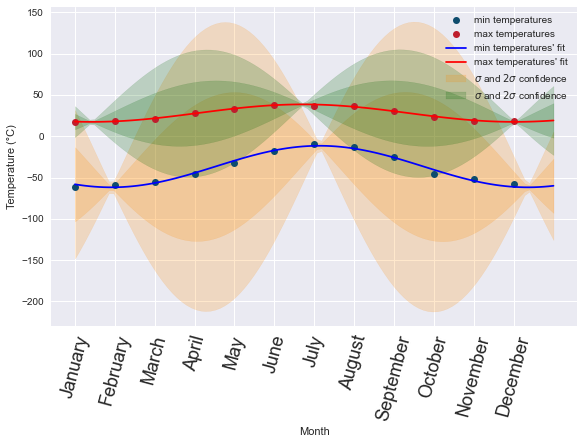

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
np.set_printoptions(precision=3)

t_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
t_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
# 1
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
fig.tight_layout()
x = np.arange(t_min.shape[0])
x_ticks_labels = ["January", "February", "March", "April", "May", "June",
                  "July", "August", "September", "October", "November", "December"]
ax.set_xticks(x)
ax.set_xticklabels(x_ticks_labels, rotation='75', fontsize=18)
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (°C)")
ax.plot(x, t_min, "o", color="#0e4c6d", label="min temperatures") # blue
ax.plot(x, t_max, "o", color="#be1e2d", label="max temperatures") # red
ax.legend()

# 2
def f(x, a, b, c, d):
    return a*np.sin(b*(x + c)) + d

# 3
pars_min, p_cov_min = curve_fit(f, x, t_min, p0=[30,1,1,-30])
print("Parameters for t_min:", pars_min)
print("Parameters' covariance for t_min:\n", p_cov_min)
perr_min = np.sqrt(np.diag(p_cov_min))
print("Parameters' errors for t_min:", perr_min)
pars_max, p_cov_max = curve_fit(f, x, t_max, p0=[10,1,1,30])
print("Parameters for t_max:", pars_max)
print("Parameters' covariance for t_max:\n", p_cov_max)
perr_max = np.sqrt(np.diag(p_cov_max))
print("Parameters' errors for t_max:", perr_max)

# 4
x_fit = np.linspace(0,t_min.shape[0], 100)
y_fit_min = f(x_fit, *pars_min)
ax.plot(x_fit, y_fit_min, color="blue", label="min temperatures' fit")
y_fit_max = f(x_fit, *pars_max)
ax.plot(x_fit, y_fit_max, color="red", label="max temperatures' fit")

def f_err(x, a,b,c,d, ex,ea,eb,ec,ed):
    # Computing df and using standard error propagation
    return np.sqrt(
        ((np.sin(b*(x+c)))*ea)**2 + ((x+c)*a*np.cos(b*(x+c))*eb)**2
    + (a*c*np.cos(b*(x+c))*ec)**2 + (ed)**2 + (a*b*np.cos(b*(c+x))*ex)**2 )

# Assuming standard error on x = 1/sqrt(3)
args_min = np.hstack((pars_min, 1/np.sqrt(3), perr_min))
y_fit_min_err = f_err(x_fit, *args_min)
ax.fill_between(x_fit, y_fit_min-y_fit_min_err, y_fit_min+y_fit_min_err,
                color='darkorange', alpha=0.2, label="$\sigma$ and $2\sigma$ confidence")
ax.fill_between(x_fit, y_fit_min-2*y_fit_min_err, y_fit_min+2*y_fit_min_err, color='darkorange', alpha=0.2)

args_max = np.hstack((pars_max, 1/np.sqrt(3), perr_max))
y_fit_max_err = f_err(x_fit, *args_max)
ax.fill_between(x_fit, y_fit_max-y_fit_max_err, y_fit_max+y_fit_max_err,
                color='darkgreen', alpha=0.2, label="$\sigma$ and $2\sigma$ confidence")
ax.fill_between(x_fit, y_fit_max-2*y_fit_max_err, y_fit_max+2*y_fit_max_err, color='darkgreen', alpha=0.2)

_ = ax.legend(loc="best")

period_min = np.modf(2*np.pi / pars_min[1])
period_min_err = 2*np.pi * perr_min[1] / (pars_min[1]**2)
print(f"Period for sinusoidal function associated to minimum temperatures \
is: {period_min[1]:.0f} months and ({np.round(period_min[0]*30):.1f} ± {period_min_err:.1f}) days")
period_max = np.modf(2*np.pi / pars_max[1])
period_max_err = 2*np.pi * perr_max[1] / (pars_max[1]**2)
print(f"Period for sinusoidal function associated to maximum temperatures \
is: {period_max[1]:.0f} months and ({np.round(period_max[0]*30):.1f} ± {period_max_err:.1f}) days")
print(f"Estimated periods differ from 12 by {np.abs(period_min[1]/12 - 1)*100:.2f}% \
for min values and by {np.abs(period_max[1]/12 - 1)*100:.2f}% for max values (1 month and a half).")
print("Considering parameters' errors, percentages are too mugh high, therefore we \
don't consider results much reliable.")

# 5
print(f"Time offset for min temperatures: ({pars_min[2]:.1f} ± {perr_min[2]:.1f}) months.")
print(f"Time offset for max temperatures: ({pars_max[2]:.1f} ± {perr_max[2]:.1f}) months.")
print("It seems unlikely that time offset is the same for min and max temperatures.")

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


C:\tools\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Global minima obtained:
Method: Nelder-Mead -> x = [ 0.09  -0.713] -> f(0.090,-0.713) = -1.032
Method: Powell -> x = [ 0.09  -0.713] -> f(0.090,-0.713) = -1.032
Method: CG -> x = [ 0.09  -0.713] -> f(0.090,-0.713) = -1.032
Method: BFGS -> x = [ 1.704 -0.796] -> f(1.704,-0.796) = -0.215
Method: L-BFGS-B -> x = [ 1.704 -0.796] -> f(1.704,-0.796) = -0.215
Method: TNC -> x = [ 1.704 -0.796] -> f(1.704,-0.796) = -0.215
Method: COBYLA -> x = [ 0.09  -0.713] -> f(0.090,-0.713) = -1.032
Method: SLSQP -> x = [-1.607 -0.569] -> f(-1.607,-0.569) = 2.104
Method: trust-constr -> x = [-1.607 -0.569] -> f(-1.607,-0.569) = 2.104
There's 1 global point of minimum: (0.090,-0.713) -> -1.032


We now try using (0,0) as starting point for all methods
Global minima obtained:
Method: Nelder-Mead -> x = [-0.09   0.713] -> f(-0.090,0.713) = -1.032
Method: Powell -> x = [-0.09   0.713] -> f(-0.090,0.713) = -1.032
Method: CG -> x = [0. 0.] -> f(0.000,0.000) = 0.000
Method: BFGS -> x = [0. 0.] -> f(0.000,0.000) =

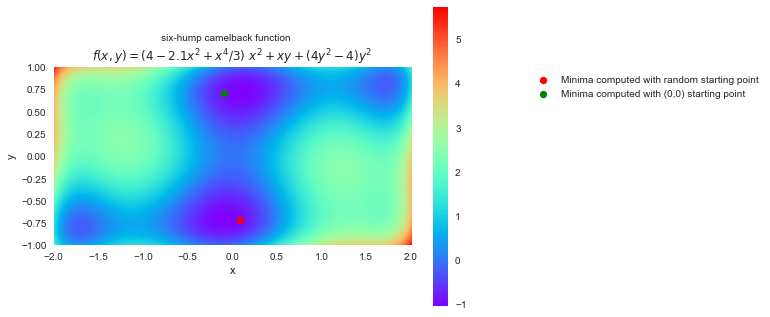

In [3]:
from sys import float_info
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def f(args):
    x,y = args[0], args[1]
    return (4 - 2.1*x**2 + x**4 / 3)*x**2 + x*y + (4*y**2 - 4)*y**2
x = np.linspace(-2,2,4000)
y = np.linspace(-1,1,2000)
xx, yy = np.meshgrid(x,y)

plt.style.use("seaborn-dark")
fig, ax = plt.subplots(1,1)
im = ax.imshow(f(np.array([xx,yy])), extent=[-2,2,-1,1], cmap=cm.rainbow)
fig.colorbar(im)
ax.text(-0.8,1.3,"six-hump camelback function")
ax.set_title("$f(x,y) = (4-2.1x^2+x^4/3 ) \ x^2 +xy + (4y^2 -4)y^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Minimization
res = []
methods = ("Nelder-Mead", "Powell", "CG", "BFGS", "L-BFGS-B",
          "TNC", "COBYLA", "SLSQP", "trust-constr")
# for fixed results
np.random.seed(2015122)
for m in methods:
    x0 = np.random.random() * 4 - 2
    y0 = np.random.random() * 2 - 1
    r = minimize(fun=f, x0=(x0,y0), method=m)
    res.append(r)
# Values of x, y, f(x,y)
xyz = np.zeros((len(res),3))
for i in range(len(res)):
    xyz[i] = np.array([res[i].x[0], res[i].x[1], f(res[i].x)])
# sorting by last column (f(x,y))
xyz = xyz[xyz[:,2].argsort()]
# searching where f(x,y) starts to have different value
i_max = xyz.shape[0]
for i in range(xyz.shape[0]):
    if abs(xyz[i,2] - xyz[0,2]) < float_info.epsilon:
        i_max = i
        break
# searching how many different (x,y) pairs are there with same minimum
xy = [xyz[0,:2]]
for i in range(i_max):
    different = False
    for j in range(len(xy)):
        if abs(xyz[i,:2] - xy[i]) < float_info.epsilon:
            different = True
            break
    if different:
        xy.append(xyz[i,:2])

np.set_printoptions(precision=3)
print("Global minima obtained:")
for i,r in enumerate(res):
    print(f"Method: {methods[i]} -> x = {r.x} -> f({r.x[0]:.3f},{r.x[1]:.3f}) = {f(r.x):.3f}")
if len(xy) == 1:
    print(f"There's 1 global point of minimum: ({xy[0][0]:.3f},{xy[0][1]:.3f}) -> {f(xy[0]):.3f}")
else:
    print(f"There are {len(xy)} global points of minimum:")
    for c in xy:
        print(f"({c[0]:.3f},{c[1]:.3f}) -> {f(c):.3f}")

print("\n")
print("We now try using (0,0) as starting point for all methods")
res0 = []
for m in methods:
    r = minimize(fun=f, x0=(0,0), method=m)
    res0.append(r)
# Values of x, y, f(x,y)
xyz0 = np.zeros((len(res0),3))
for i in range(len(res)):
    xyz0[i] = np.array([res0[i].x[0], res0[i].x[1], f(res0[i].x)])
# sorting by last column (f(x,y))
xyz0 = xyz0[xyz0[:,2].argsort()]
# searching where f(x,y) starts to have different value
i_max0 = xyz0.shape[0]
for i in range(xyz0.shape[0]):
    if abs(xyz0[i,2] - xyz0[0,2]) < float_info.epsilon:
        i_max0 = i
        break
# searching how many different (x,y) pairs are there with same minimum
xy0 = [xyz0[0,:2]]
for i in range(i_max0):
    different = False
    for j in range(len(xy0)):
        if abs(xyz0[i,:2] - xy0[i]) < float_info.epsilon:
            different = True
            break
    if different:
        xy0.append(xyz0[i,:2])
print("Global minima obtained:")
for i,r in enumerate(res0):
    print(f"Method: {methods[i]} -> x = {r.x} -> f({r.x[0]:.3f},{r.x[1]:.3f}) = {f(r.x):.3f}")
if len(xy0) == 1:
    print(f"There's 1 global point of minimum: ({xy0[0][0]:.3f},{xy0[0][1]:.3f}) -> {f(xy0[0]):.3f}")
else:
    print(f"There are {len(xy0)} global points of minimum:")
    for c in xy0:
        print(f"({c[0]:.3f},{c[1]:.3f}) -> {f(c):.3f}")

# scatter plot of global minima
coords_plot = np.array(xy).reshape((len(xy),2))
ax.scatter(coords_plot[:,0], coords_plot[:,1], color="red",
           label="Minima computed with random starting point")
# scatter plot of global maxima
coords_plot0 = np.array(xy0).reshape((len(xy0),2))
ax.scatter(coords_plot0[:,0], coords_plot0[:,1], color="green",
           label="Minima computed with (0,0) starting point")
# legend
ax.legend(bbox_to_anchor=(2,1))
    
print("\n")
print("As we can see, choosing (0,0) as starting point leads to \
probability of having (0,0) as local point of minimum.")
print("However, most important thing seems that computed global minimum is only one \
in each of the two steps and it is in different locations, but the two coordinates of it \
should be valid the same.")

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

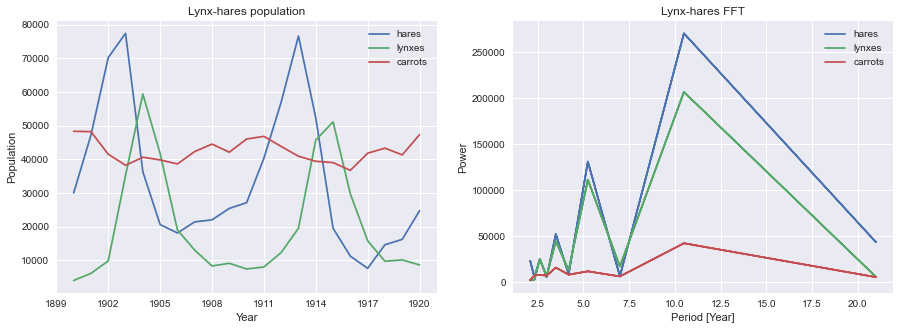

In [4]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
np.set_printoptions(precision=2)
# year|hares|lynxes|carrots
filename = "populations.txt"
try:
    M = np.loadtxt(filename, skiprows=1).astype(np.int)
except IOError:
    print(f"Error: can't open file {filename}")
    assert(False)
years = M[:,0]
populations = M[:,1:]
n = populations.shape[0]
t_step = years[1] - years[0]

fft = fftpack.fft(populations, axis=0)
fft = np.real_if_close(fft)
power = np.abs(fft)

freqs = fftpack.fftfreq(n, d=t_step)
# Ignoring infinite periods values
with np.errstate(divide='ignore', invalid='ignore'):
    periods = 1 / freqs
periods = np.abs(periods)

plt.style.use("seaborn")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(years, populations[:,0], label="hares")
ax[0].plot(years, populations[:,1], label="lynxes")
ax[0].plot(years, populations[:,2], label="carrots")
ax[0].set_title("Lynx-hares population")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Population")
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].legend()
ax[1].plot(periods, power[:,0], label="hares")
ax[1].plot(periods, power[:,1], label="lynxes")
ax[1].plot(periods, power[:,2], label="carrots")
ax[1].set_title("Lynx-hares FFT")
ax[1].set_xlabel("Period [Year]")
ax[1].set_ylabel("Power")
_ = ax[1].legend()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

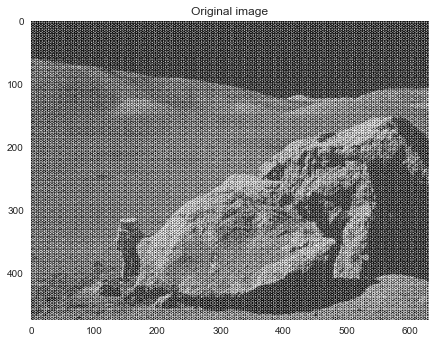

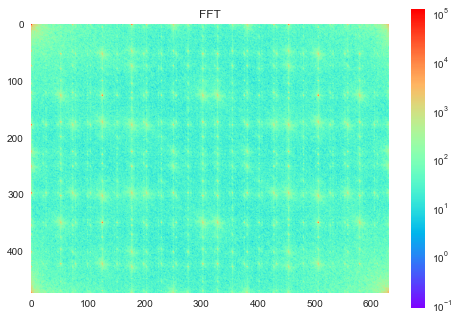

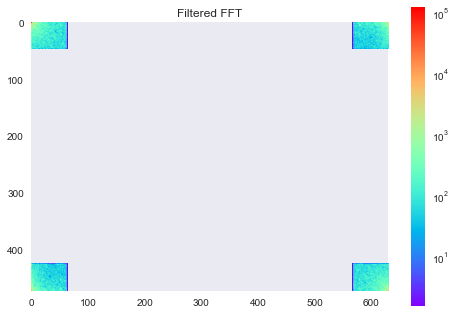

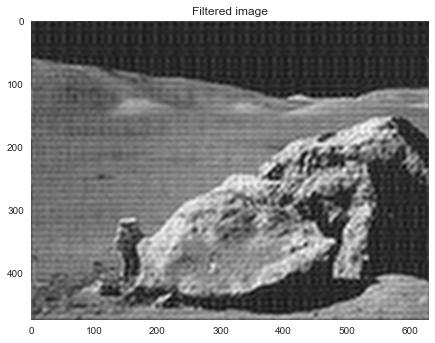

In [34]:
import numpy as np
from scipy import fftpack
from pylab import imread
import matplotlib.pyplot as plt
import matplotlib.colors as matc

filename = "moonlanding.png"
im = imread(filename)
plt.style.use("seaborn-dark")
fig, ax = plt.subplots()
ax.imshow(im, cmap=plt.cm.gray)
ax.set_title("Original image")

fft = fftpack.fft2(im)
fig, ax = plt.subplots()
# There are some problems mapping values to colors beacause values'interval
# is very large, so we rescale values logarithmically
imfft = ax.imshow(np.abs(fft), cmap=plt.cm.rainbow, norm=matc.LogNorm())
fig.colorbar(imfft)
ax.set_title("FFT")

# Fraction of coefficients to keep
f = 0.1
fft_filt = fft.copy()
r,c = fft_filt.shape
fft_filt[int(r*f):int(r*(1-f))] = 0
fft_filt[:, int(c*f):int(c*(1-f))] = 0
fig, ax = plt.subplots()
imfiltfft = ax.imshow(np.abs(fft_filt), cmap=plt.cm.rainbow, norm=matc.LogNorm())
fig.colorbar(imfiltfft)
ax.set_title("Filtered FFT")

im_filt = fftpack.ifft2(fft_filt).real
fig, ax = plt.subplots()
ax.imshow(im_filt, cmap=plt.cm.gray)
_ = ax.set_title("Filtered image")